# 5.4 딥러닝과 마이크로 서비스

- 작성자: [김찬란](https://github.com/seriousran)

## 5.4.1 Flask 기초

코드 5-25 Flask 설치 명령어

```
pip install Flask
pip install Flask-Cors
```

In [0]:
# 코드 5-26 Flask 실행
from flask import Flask
app = Flask(__name__)

@app.route('/hello')
def hello():
  return "Hello TMI!"

if __name__ == '__main__':
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


## 5.4.2 케라스 학습모델 불러와서 예측하기

In [0]:
# 코드 5-27 base64 인코딩과 디코딩

import base64

with open("cat.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

In [0]:
# 예제를 위해 base64 인코딩 된 값
encoded_string = b'/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCADgAOADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7CtJgBuHBHHSkuJRlfrwQuMVHCGQgFeoJH4Y/xqO9k3yKFUk564ztrQ6xb2Z/sodDnJ5Ynt0BH48UC+mdOcKCMH0pls2JQoXYrE9sHpT5l2A+7ZoLTAExrw5HOQasx52Alj16etQRRfKC64x0561YZv8AQ2ZeSFOBS21ZR8mfGj4vXfjP4yXNvDqFxYWWlS/YkSOaRd7qx3NlSDnpjuMe9en/AAh+JWr+HJhba3fx6ro8p2rcyzGS9sn45dfmJX1HmNjOQM18Z3PiO7T48SyzXn2YS6i8rF3GN3nHKnJCgjPcjoc19l+DNIv9a+HK/bda0yW2lJSCOK6d/s56/fEhQse4CkYIr8ohiMQ61TE03aSZ+j18JQp0YUZpcrSPaRwo6cgMCO4IyD+IIp0abnxXmf7P3je/v9Su/C2qvA11YJvsHSQMbuINgqME72GRgdQMjFeoR2c0SlghwORuGC30B5r7zK83o4rDqrJ2l1XZnxWNy6eHrOmlddHYWSMLGOSMegqOaQFlx1z06VZn0u7I2i2Z8qHJUZABHB4zWLrWowaLZrPe3EFqIeWDyqCD6Edf0r0J4qjBXlNJepxxoVG7KL+42jdiCLLfKqjLE9hWXfa9c3miXF1ZIkdvCCTLIeZAP7o6/jxXP2Nxd/ErUYoraKSKxyGZnGzcOwZTjOfpxVT4+Rf2D4LNjHcpDc3OI41kHlE84+TAXJ56gkV8Pm/EM6rcMH8K3fc+ly3KIxcZV/ifTovU7bwzfrrGi2l1Hlo5kDZY7jn61p7eazNBt5LDRrCBcL5FvHGcnOCFGf1q9FI4yXC5x2719lhFL2EL9kfOYrl9tJx2uNupgAMDOKqxjfKTj8KlupfK+fA6euKp+dMZ8oi4IrrW5zlt2UR9vTrUdzPiPHX6dqIYzeEeaBgc46g/hU/2YGLBzz0wK78Mle6OTEGQbjbdn5fl9e1F1KywMy84HXpipZ7TypW7D3qzFZPJGNu1wevNe7H4Tw5OzLPhNjcAkjOGyp68Y6V00sHm2VqDkeXch1x2IRv8aytDtUtYVUDHUkjpWtNMf3GFLqHLFVP3+QAP1rkxa00OzDMu6nqUOn+H8Tx+Yu4sUYAhtqs3+GPevgv9sT9ovSPjvrWjWOkwahbJ4Xa6t51u4gmZXMe7bgnI+TrX3R4viA0+3DhjuExAXG48ADGfr+tfnh+054SHgv48avZqqxiQrd+WAB5fmruAOCR+VcODinJyfQ1xMtOUx/DA2zfjXo/hQbdleeeFl3MD6Afyr0jwum6YZ9x+grTFSSTMcOk2fUVvLviw3y89TVe9jHlnIB2+3DU2GWRx8y4JHaor6xe8IO4oB/CvGa889gQRYKY+Xt6c9qsS/I4G7O484/h/GobfTU+ZCXO4g9far1pYrbJhRnoBk9KAES339iefWrC2G4c9Dwef/rVKs3lrjGOMcU+KYGL5f8mgHtc/Mv40/CPVrv4k+J9WtGitNO07W54Zl3GOdZVcuxiGAGBUowPvz0rsvhJ+134en8NXlvo3gu81HUdNdkvLq523reYAuNzTMVHUfKmOOxya6b/gpLrWm/Yzpks402e4naSOTy1KyyAEDeuQGHPeuO/Zv0lPh98NrZZbq71zUtzzRxXYDJagkfKijhduMjgYJJzX5lip0cPGo0urP0alz4mFO523wX+Ivifxn8RrTW5dOfTLazP7iW3j2sHJBUFdx2jAPT8gK+tvC/jP+3LbUrq9byJbb99FG20DYBlgQM8g8Bu/fNfMieMda1ezQuPsqQEAuhYOcDjJz6DrXaWatb6Nfal9sYvfxeVsYnATHzMoHXIOa+GxOMl7S9N2PoI4S8EpWPc08XRzXFxZreRLlQlvN5jLkMquFYr9TjrXB+J/Dra9q+japNHHPYG4JuTG5CSkD5crz1OCRj61zF54W1Pw62marZXK3mnmCGPcgJ84j5j0z8wx09q6CDTr/Q9dn0qFnRbtBfW6kkGMyN8wC9CO4+prkqZjX5bS2KWCpQ96O503gzxIvhXxC8Gp+VJK7s/nNFuP4YwPz/OovHfhgeNvFOkWphl/sSSbzlkGPsxkQ7wqrjKn8fWuh8Oatc6Xo6adfWdvqdrcMS5aIfdyeCDn+dZXgi90rw18XNbs7D7KBeWfnSQxAAKM4UnHGc57CvoslxUMRyYab3aueNjYunz1l0TOxwFcbV7469BTnTf3P4VVN+kXJyfxqOPVgzbhjbn1r9mVlsfmtmyW4VBHjAI68ioIrhY5yMbRiqd5rMCzupljVhk4LgHH0rLj8Yafezy7bqDKAhhvGfyqedXHyM6KPUhj5F/HOM1KbohMnsK428+JmnadOkZlSR2xhQ4U59OTWjoviqPxTC3lSWsMiMV8szqXA9eDXbhasU9TmxNOVrpF7VNQ2OeTntVix1HbGOe+K5fXZLiK8lVYb6fbgLMigw5PX+IE8V5/4l/aRt/DHha5vLW0uNYkhiLRxWkfmmRydq52scLu25PYZ6mvoKNSNRWp627HgV6cotc2h73p+oSLeY2K8W3qDz/Or8OrtN4kt7JVYO1tJOrMuYjtIG0kd+fyFfnZ4H/a5+LPgv4kaj411bw1rWq6XJHHbNpstm1t5ke/b+4Bl2Iw3EkuNzbcd+Ppr4Mf8FAPBPjLxdtvU1DRhcw/ZrafUIfLSS4aRVCKAW2l+dnOW2njjnmxPPb3otHZRUVtJP0Po7xCtzrlrZC0t4wxMpPmchRmMA43DqQ1fAX7a8csf7U3iKG4kjkntorOBmjXCkC1jI4yfWvsfxX8a7DXPDeoHwzqdpLq8Fo5t43bkOPmBKEgnivz1+IHirV/F/xP1rUNfYPrEtyY7oqu0Bk+TAXJxjFceHi4u5WJkvhRu+FPvD8P5V6X4b5mH+9/hXm3hSPO3Hf/AAr0nw1lgh/E/pUYpiw610PpGG42g43Y+vPWludQCIFBC4xnPOfes2K/J+b58noSelVZ74ytyPlA79q5G0tz2eU1rS+EjNtO0q2Dkcjgdf0/OrMd2SxG8Hb17ZrFtb4QyncyLkZCs1R6h4ojsZCoR2Z495IHQYz/AI/kajnXUOU6VZsA7Tk98npUiyYTBOP6muD1n4owaFChlLR+fxGW49OT+dXLHxRcalaR3EM4uhKOI7YbyuODk4wBnPWo+swirspUZS2PD/2o/hJpHj3xfb6jrenG5OmuBpxR2WQy8nORzjgfpUnhf4W/2LbhpHeOeV/Pkk2ny2J4+7wQa7H4j6g2vfEYW5hT7PpsQaZj3Yn0PTp61y938VU8c65c6dZLHbW0C+St25Royf8AYwckjNfjebXnWm79T9Iy6bhSjDyOkl+Cp13TCUlD2+0sWhfdsPc9Ky7hpvCOn+HUYPbXtjrUEMpcBlkRnAVgOB0yOfX6V458d4viJ4L1XS4NO+IN8ml6lazNGgto9guUddsQO3IOwueueK8hs/2jPiD4FvtEtPHN/JrFvrerJbpM0KQyaaRJiKRSAPNA4LAgYA7150cuVSSUHr2PRli3FXnsfdXjbxX/AMI7o2oxWozHBq7XUMMZDMUljVRjOM/NuP411Oi6iPFSatqLrG82m2tpHC7Algqp83A6knv7DArg/wBnLwTq/j3xWdM113nR0SWGZ4j5ckecr2HXNT/E651X4G6xrZv/ACY7eaRbGyikBQ3M7MQqpxjafxIrLEYKdFe1qLTYiGKhV9yG6PffDt1FrWqv5UEc0G1cyL91jjkfliq+v/Cm10u6u9VsY4/tVxbeU8hyTkHcNwBAxXzz8Nf2u9e8IeG57jUrCxt5LO/SzS0aY5uUYgbxIVyW5+6FxxX0t8OfH8viTTm+36ettDqQPlFJfM8tgOAeARntxRgHQVWNSD1TucuNp1uSSS0Z5GieILVVEt9FIdzb0RkQqO20kDmqya5dw24gnuvJiyNzTKCT+IGPyJrro/EcWh39wkukS3QDnMtwQNnbAGMVzPj34iRWqzGxtLeyEbZaQxJI0iemDx+Ir9UWOg9Wz4v6rI0PC/hixltVJuLRGYkQ7W+Yk9e/WtK98G2Oi2qj5fSU44U+pyOBXiHxM+J2u6P4Zeb7Q8UUzZij2ZVk4IIyePTirfhX4o3PjHwNHGZpft8ER+YgEkB+/c4GOvah42CVxLCSejPTdX8PaSx8m1ScXMRy5DKVLdcAkH9K4/xHrGneFJIbg2oSEyAStEN0kQzjc3P8u1cvrk82jyFWu5ppLjhRC/UngnHAAz6Vh+LTF/ZYjklLLdS+VIVb/V/L8oPPqfyNZf2j0ii/qS3Z2d7+0zplt4ilsbSW6u7eMtseBCjHp0DYx19+hrzTwtqvhXw1pWsW2n6e+nRyY3mHa5lAbcqkurfxAdMGuL8QLD4L1bzFllfqDtO4oehxn3P6GjwP4osJL2S1e0Ooy3Q+cBhtDAZznPA5HSunD5riYP8AdScfRnPXy3DVI/vYJ+qOF+Mvh6T4narbx3FzqUiedh7CyvpY4Y0GflIBA3Hg9eh6Vl6x4CtvAfww1e10/dBMsC307ljIz+Q4cbixY9vl54HpXdLcG71S1v42EfmT7CrhdxwrDJUcY4rmfiJKNUm8SRFzHFcaZdNjdhOYCV/l06V9NSxlWrFe1k2/NnzU8LQoztTikvJI9k8A+M7q98WQanPO739yUkRjGMkLGq8gduD+Zry3VtVbXPiDrl2WWQXOoXEuVGA2ZGPH512Xga/E2iaTcwqIw1kJAqtuY4Utkk5ODsP515v4PuTd3bSN1kcuRnoSTW2Ebc5XM8XbkR6d4Ti3YIwMdfyr0fw4AjKB05Fef+D1LIvtjI9eK9C0EbSp9zTxMnYMMrHZ6X8WX1fSHu9PtX1FtwjMUAZijAlcNxxnPcc7TVG6vvH1z4qjNtbWNrZgzMDJPHJvQ52E4bIKemMkn2rh/CninRjC/wDpmoRASYjtH8weZngfPuPyjoMkcc9a9bsvEjLaJLZ6fbR20kAAVJxK4IGRngH+deG+d7nvcyXwmPJ4W1y406P+09Tu9Tuk4aO3hNqgB3EjJJb+M847D0rS0TwEdXnMd7o2oCztkEtuVu3O7nOwgMAevU5P0rSs/EpuVeVWRPm2Ak8Ljjvj1rTm8RjQEMt1ejy9v3R378Y59KytIpyTdiO0+HGm3NsJJv8AQHjdiIXYyKp+X5vvDHPb8sVpaND9nvUsvt6XVpH8xiRSoIHPA5HvxXKn4s2eoSrEumyyvveIO8oUErxjg9CVPJre8O6sNSjhm0+3k+13G+LyA0beSwBySxOMcdc1y12mtDWjzXseR/tEeC55fixbD7deW2nX9t9odIMZcqTkE4JC4bk1xHiPwHo2t6ZDMv7y0iQCOWNjASxPbHB5Ofuivoz45fDFPiv4Gty7C21ixj2loWLfNjoSpGQcnIr4j+J+h+NPBWrpptpdzfZopkMVsQqgDOdqsynjOe1fOYvLJ05v3Lp7M+gwuYKoklKzXQ9V8O6F/a2ktoutQz67oV0Rtt7osxj25HDKQyMOx4Ndjqn/AATN8LeI/B1x45ttH8R6zrujwE6cNR1BriGDIyQoQKe+OefWuF+A3gbxl4r8UWouUJ/eJK+XIRR3HC5yfXv61+n3wf1jTfhh4NjfUobbS4pFVpfOb5VwPcnuanKeG6rqOpOTijTMeIYQgoRSkzyb9ib4c6qvgLw9e+INNEGqxQFGj348tVJChh1ztArsf2k/2FtN/azttE0m+S4fTH1L7TfT2k4huLMAEpJExyNwfHUEYPINM8XftIeHPA/xmbTkvIUi1G2W5jDEiJ277G6EnPTOfat1P22PDnw5vdONzdS3M93PhbWNSZBGPvN6DHvivocVhcDSoqliGml1PGw1TGzquvh4NX2R83/FT/gmS/wL8Sw6wdY8SeL7rS2MmnrqNxbrFbMcgOUhjTe/ucfSuv8A2b/BuqagZZ9blkm2SpHEiKERTnOMc8j1zX0t8SfE1l8a/AN3f6a3mwygLHcKxV0z2PpXG/Bn4PNZ6pHPcXbyxw9YgMLnseg596+XxWQw+uQlhf4b1t0PZp51UeGlDEfGfPP7UPhs+APixIRNJau7Ry20bRllk3ZDEHGOP615h8SYbh9FknJZ5GUbt2Cqj6Yr6k/4KFfDq6jsrfxBYwxSfZYQJlA3ScN1APGK+WdP1tte0eTzrcblRmcFjtPBxnnOOPSvTxVONKs4HHhpupRUzzr43+JZ9a8L2Si2maZdvk+UCRx1z/8Arrm/BHi+a41eFZFKyojRLg7QcjJyT7iofG+vMwjGGURjAIchVbJ4468fhUd3eR2d1pdn5EjSTR7jOCNysTn/ACKpLQm7udfe6pNrskX2q1kubSL5LWVMjzSDk8Dv+nNc9beLYtU8Q7L5mEEbpPErkKQwIGAMDPyjrTtb1N9I8PGGKUvIWZi4baZD6+3bjg15Pbzmz8V7UkmaKI5USHnaeOnPcmnZdB31sdD8XdVSTU7naXjt3maQz7SWcgDGB359qyPDmt/ZNI+1f6PFImZ/9WcEnacDJ9P6Vm+Orxr6+gNxKdqMZEQfxLxjP1rrLvQYIfA2oyS+TBKqo0artO12I5AxW0bdNzKeqMaxlXUr60KP5d0zGQTKCFB6YPReR3NXNU0BNQ017twCPs8sUiZIBDIwJ56c9KekKaDPZeVuk3rmQtHtCtnOMHkg4/WtDUr0W/haGYL/AKTdXZJT+6DuI9j2/KvqsD70T5HG3jPUr+FNU/4Rn4YvbvdxG4sNOMcU8ZB80bXKkdujj9K4/wADAqUz1IHGPrXaj9n7xNoPwf1bVNYaK2NlZmQq5AaVQNowB24XP41x/gZeUP8As16lCHI3dHDUkp2TPWvCH+qX8P5V3mhnDL9TXB+El2xr+Ga7nR28sA/U1z4htuxvROBvfHPgzSfFkAm1Sa+t45Cs88AHmRAqQCseOQCFBGeMivPPFX7R+p6Fc3DaOZUGHFuvnFg4yUUk54JBBAAz0HpXEWls3nXLtukmMcbhWGGbDFXOD3wfxyTV9HsvElxdRC1iigu1kcrGNpd1y/Oeg+70x0ryfaye578aMUejeF/2vtZtvIl+y6dfJG483zEO2QDcDjcTwDt/LNdd/wAJI/jWATXF5FLLLIJ3hUfIrHKlQuccdMV4b4F0+FoXtY+Rv+STZ0Upk8Y/P6V6d4d1GK1bdGAiM4dNy5xgDOD9c1x1k3sdFJJHpmj6r/xJY7K2t/JtGiTfhf3iyAg5BxkDnp2x1r1H9mH/AEv4giEmAFrdlbcvJwNuSe/T868xgkSOyhmnULFuwB174B9OR/Wuu+Dd2NJ8eWV/G5+zSTvEyKnJIGAPwJ6+1c1Gyqq5dVXg0j6PufDEWiW8tqGDyT5kwnp/KvPfG3w5j1jdKLeAlQMF1UPx/tEZB9+K97PhSOSSafCrvBUFRgkde9ec+OtEmtDK8LZRORjo7dq+pqUFGNkfNKo3K6PKPCso+GOtJdIHRpZAZfPlZiCCP9Wx++2PQDHrXdfGD4l6Z8b/AIbTadc61eWSsgKypcuTkcYPyn0rn72xRmK3kTTSMQMp95mbHQ+nXp6VyWpfCZhqDz2Ny9vFbkuy7jsPuR0ryMXWUaUovZndh6blUU+qPPtf0/wrYaTc6b4gvLXV9CSNvJQnzZzcc7XT5co6nBDACtv9n/8AZ5v/ABDoqx6db6zqLSqq3V/e5W5AJycuwOAM8DpXpng/wdpifZW1XTLe/juzhG8oEMy85/SvWdG1qfVdQ+zW1n/ZywIGEEYCRup6Hjqexr4PH4WjX/dzl7p9xg80q0Y3gve/A9D+DvhVvh/8LLbwxFdPdvvElxKzbimP4VP3T9K9Z8AWn2eLnnpXm3wwWS4tlLKodWIKgY2+1etaVaxNaidABKq5O04yO+a+pyqEIQjGGy0PmsdKVScpy3bucl+0FeQXdxb6dKkZF1CyMpGd6njFfEHx7+Gx8D+L2gtvltNu6JRwCCOckda+svjZqLXPieyuIpWkeBdw385TPIryb9q7Q28UfDqG+0y1jmvrSYLh22BlYY5JPQH3r5/MK3tMwlY9nC01Tw0T88PG1wJ7q+iuHEAinyjLlg43Dnj7v1qay0uWbX7SG4aJDcR+cHz1AJUH8feur8U6Xa+Hv9IhtknuYnKSMqm4A679oBPI/wBrsKrSaKniQ2lzpTfarpIthBBjJO0kEZ7AH9K9T2bS1OJ103oMf4fwaneM13O9isql18weYC4+7n864/UvBEhEV1tO2VwhkRchtrYx7nrXlP7UPxd8Xfs5+INLg8bagl/pfiJJWs7vTEMb2YxtZWUnO4dQcEZrjfHfxm8PfGu1sT4e8eaxoEiIQYp7iSOGUhURW2DlWOGz1z16mu2jls6lpX0Zx4jMVT6an0bd+D7C7uBLLFI7sdg3ELsIwFx+GateCPCUXi+8UWSLtR0u5YpSJC2SBg57Db075xXzN4d8Ga8LuCxHxftlnvEJhKb71s43ABdpIOB39K+lP2RPH+u+Iraw0jVNVstSg1x4bWO/t7IWupWzAj95kLs2ghcZHJJz2oqYH2crRldroZU8yjV921me0aN8EH15S5sri4R13zbbfbJvTOeOTjB+nFZfhTwJF4Y8f3l5a6PdavaWsFobac2/nWu51LPtfbtLq0f8JyOQa+insXgmhK3+pNNbFeQURXZc/MVC4OckkdDkelcv8QrW9i0CdNOa1xCvnBWjOxAFJ4UAdc8969TB4+nRXvK55mMwdSs73PEvjP8AHS6+Nnw21nSdAshqV5chYZkEg32wWRWYAHnkKcDv+NeFaFo994an8nUbOeymB+ZJUK7T1r0i6+HXhTW76a/0y91PQb3dvmCkiKE/3gow5U/N0zya73w58EfGdxYQPYa3oniS2lUNErMskjL1PyyLuH4816n9tUKru9DzlltSnotTg/C96qqMMOueDXU22rrHCT75+tbEXgzxJaQq0/hXS5h5pj+SD5jt6nCtTJTf2kTGbwTH8gLE/Z5gAB/wKh4ihUl7si+WcOh8i3+sy3Xi2XIRmjd5xcgFTCAQcZHYkLj06d6seH7oahqJRRveadIfvAYVmKhfXGT+AJrmtYvbi41aCOSSZzGPKhjRBtkBHXOOeE/SrWmKIzHKXUT+YzSANkq2SGH14HH+yK890T2ozO2j8M3elawJGs5MrKyPtb7w2/d/DGc+1dRbebYWx3sFt1m2tkHlOckY4Az/ADrnLHxV/aR3RXDobUeYxRwMgkrkkjp8wrUg8RXGlC5iWeFFmjVLhY1JDoQAytweCNoyPSuWaZ1wmrHrmkeIrQ6cY/M3QqwZ1b+Hac4/TP4GvVfhytta38Usi87RcYjO0YIyPfnINfNWheJZ77UpWigNxaNvlaMc/u1yWLH1CZr174V+MG1i0vAizQvaWwIXOQqhwq4Ppt215OJ5qa9oddFKcuU+9dERPE+k2U0rSY8mOQRq+0AlQfmHf6UzxDoX2m0crErIOiqOM1w/wb8exa/4NtWhlMg2BCc91ABz+Yr0eG822qoHysYLEAdT2r7SnL2lGMl1R8lVi6dVx7M4HSPhPJDfz391N5sj/LDDsH7hSf51l+MPh0uieC9UVYpjPqCtCmR0LcZ+nNep2l6sj5X73etNreDW0SN9rrE3zcdf84rzMThFJWR10KzTujhLP4WDSvDemwAb/JSMA7ehHWta38LM7xzqSssDkgn+IeldvGwZAqchOgPYVNHaBSXCgIw2t9K+cr5clK6Pbo4qViLwyi2lys0Y2kjcR2Y10+p60dH057qMqyyc7c42msnT7XyLcYUHacc+lcN8V/G7aD5bQuyMZBCE6/N9KJV/qlJzkaU6LrVOUXxbdRa3amdI/wB7ASykt15yV/nWZY2Vp438OahpMyEwzoyY4O3jitDw7f2smhLFMMPJIzFl9T14rnPhxqUUPjLUbKFxsgYgehANfIYmuniI1P5j6ClC1CUex45pfwdstCvZ4orNLea2c+asECqzHkbjjt61geN/2cNGu9cTUY0uLW+iczM9pIUCnaPkVTwQfSvb/i94abTfFseoQ3LQPPHtJAzg5Pb8axv7Eu9QssyXMksW4MWYhRgdO3SvuYYqMqakfLVKPJUavoflx/wXY8NyPonw/uWtUjjiEtu8wUq0rjDZx06EZ5r889P0tLpgORz1B61+of8AwXm0/UbfwF4KjnxLZjUrjyCsqsjL5aEnaPu8k9a/NTS7NkwduFB5Fe1lk70NO55WOSVSx1Hwf+I2ufB7xDcNoCwtNqMYgkeaASuFBJxGT90nJBI61+sn/BP7wJZeN/DOreIrMw211qU9lLcCyJETNES4wpUKN2eQOOAa/K/4LeRH4sN9dSlYbM7FUDc29ifuL/EBghh/tCv3C/4J+eDoPh3+yp4PR3jxqMMd86s2RCkkeFVfcYTr2NefmcbVfaLcnCRtPmR2d/4RuWvYLny2SWFwy7uY5D1AK9/pVTXvCsuiWjTXe6MR4yyxkofXpzXqVlBb3rx+ZbC4VZRJG2PusAcHH4/rWrJbSXNpmQb5wTtw21Tk8fpXnSi56yPU9qfO2vfCuw1/SorubT4J7dVLxzS2ylY0B5PzD5RxXxv8cv2xdC+CHxU1nw/FZ3s0FjeLC96sytCZTwwg28DadynJ9ccV7f8A8Frv2y9c/Zg+F+n+E9K1COFviHbS206tEzXVrbKyrLKrfdUOrGMd/v8Apmvy58U6TLN8H7S6F3cXaatcyyx7CVPlqwMbOh4BPX3/AAOfayXJadVOrXu10RwY7MJxly09z9N9D/a/8IWOjae8HiS1P20mNrcXB8yBlKhs+vf8BmvRvDvxrfxnaefaXN/f6W7eR9ptiZI5XHJHXg4Zev8AeFfil4c8Q6pqWlBbeaGw1GCWK2aBIiHkxwxOOAT0JI7e1fdP/BF79pPW4f2r7b4f3xN3p3irTby/a3fT2jVZYo1ZLjn7uUtpUOeDkDrivQxeRYelF1KLaZyQx1SbUZJHiusS/aEs5k3wosZmY8jAYKFxz15BP41qaBpUljqcT/ut/mb9zIGwxxkfXIxUniCzjfw7HLH5Txo4QPngAZxj1PJ/Kr/h9XGnW7kiPy38tpMZ56hSPrn/AL6NJxNue47wJ4euI0a3u5jEZbfKNJjHUgZI5B+XHpzXT3ERXXrdFRUjmsYpCARhAdqkn3BU5B75rJ0vVorDWhxFC3BDj5kC4AAwe+7H4Zrt9X8B3K35u7u2a1gmt4SscUgYS7YwJCG9d28n3Nc7ou10bxqJaEPw4s30vVHTcXQ74ZCR/rVkQjA9AT1/3q93+H/g270XwZqN9cCO3mvYSkMCrnam4HdnuOMfhWF8OPh/ba14l06QWKL5ojRmCnYiqeS3qxB5/D0r3TUo4L2U2qKPLig2Kqj5QB0xXz2byaSpPqezgUpPmRy/7J/xLlsLq60yUvJHFMA2SQqA8cflX1Dbay2lNGo2uvU5PJr4x+HRvfCPjueSRF23P3hux5Q3fKf519L6FrMuo6OLjzz56ghkcZ2kc163D2JvQ9lPdHBnlGKre0jsz1PTPEdvfpghImA4I6N/nP6VFd3U9jrGl28EuYmf964PUV5pZ+J5UumW4/dKeIW7M3pUmg/EC71XWrVG42ozNHn7y84wa9LEzR5VOLuezQeL7WQeVK2xskjB6gcAVq2WtRGNoxIDvYYLH7teFWt9c3zySoXl0+SZmEn/AC0jK8nH8q6Gw8UNeXtujyZVVEu/pvHpj8a8arWsz2KEHa57A+rlrUgD96VwPQtXgPxLlvpfFTG4lwXdhsByF967mfxhqdtayNbRrIhG9WxlifavC/Gsev8AiTxct2ZnTa7EKy/d57ivj+JMSnSSZ9HklF+1cmerW901zNZReZ5Sx8FgfmPck+xAqj8GdcTX/iZrMqeW0DOypt/h5rltI8ULpWsPBdq0WpPaOP3mcP8AKeUPQ1T/AGR0nsL++kuD++lncBj2BbivlKdXmxFNLue97C1CpJ9v1PbfiTBbTadFNM6xLCSC5HTivNdQuIo4DLChuIh02yHDj2Fex2unpqNgYJiH8wHhhnPPaub1fS7KK8Fq1hIVYlXkAAEOBxx3z7V+kZbWhytTS07nwmY0W5XR+Wn/AAW41GXxb4J8Jww2E0McF9cSMQpIX92g5PbpX5yWGizJc4OcNjBI4r+kLxV+z14b+JejS2GraXp+pWlxw0Mxyr9eo9cGvG/En/BGf4L+Jr5JV8Ovoxx8yafetCv4da+kw+IjGNuX7jxqlDtK5+OHwusTrDaPo8Np+/juJZ5JsHnfhRkfgD171+4/wiSw07wTo+lQoqR2NrDbxsvcKoAx+VcV4F/4JC/Cn4Z6y2paVYavf3EJDhb++M8I9wuBivbNB+FaaFdq8ajYpJCg9hXFjXGVlJHVhlyLTc7Dw1pzm0jDNvKKFDSfebHrXnX7Q37bXw//AGZLHbreqRX2rbtiaVYYnvGwCSWQfdHQc/3hXz7/AMFMP+Ciz/s2248HeDLhU8ZRSwveXjoQdJieMyqEJ+XzWBU9DhG96/LHS/iBc6/4l1G6upZLm8vpjObl5jJM7K3zM5z949Sfyr1MryRVYe1q6RPPxWNdOXJDVh/wUG/ax+In7WXxi1DxRr+mx6eqW0drY6ZDKZYtPt1z8qZHOWLMe+X9BXivg3xXqXiK5+y2l9emeO38p1nXaqsmMBedvUkdO49K7n4xeL9U0qOOKayhu7W6KKJc7Xjyc4B7nHI968y1O+Oj3keoaTukubpmFzFI+0xHaMFVI6n5yfda+hUIUvcp7I8xuUvelud9r8VjpniLTdVjvj5t+iTyxo+ZYZto3KBn/nrvX5u4J716v+zj8S9S8A/FHwp4k02WW11Tw/rEN2bdZjG0/ldbaRj0iljDxkdP3u7Ga+Zba1msvENhNGp1WcfvbiQSb3cnL7c8Dg5b3wa9G+Ht9rvg/wASRTx2ltLYX93tW2EnMbuCBKM/7KOfTJ9q1cuaLj0Et7o+y/B/wvvPHnhd7aOyMJs2MrmRcmYMw2hVH9xQQfXdXY6L+y9BYaJFJeXrxxXj7MROCxdQrLnPpkYbvvPpXunh/wAUaV4REmmxRf2eVYxlceZJIVKgkfXv25rK0/TltL/fHb7Dc7EdHlBXduOFI55ySBXF7GjSj771NnVm37qOAu/hJo2karYW1mYhJCd3nvGWkQEMNozwRls8+vtXW6/4EOqXSq1w9usSlwEjBRyc5yOi8VNrXiTTtHl+wrPaQXjvvuI1/fSqgABIJHBxs7/xZ60mkePLe5mls7fTruW3hG2GaX5nlGMjdnoc8V51fEUlpFHRTU7q5sfBOeO+8QWIFlLIsSzZk2FEibZ909ieB+XvXZLf/wCl3YDYYsQP4Soz0/z6VmaDrd1qf2WBhHbIvzFbdfvZPzBj/hWDqHiyOz8UXltcMUj34aQDk+gH6V8fm1nWUj6nLG+RxRt6h4eWKKWcOX8rkspzjr9410nw58f21jHFbXreWoJUyF8+afQDqTXO6H44giSSLhYrk7GDjmT6VzureHpNbtb60uADDkS2skLfvG6Dg9h/hRTl9Uaqw1vuOrGNe9Kpoew+ONakuSs9pMgVFJ2Bucdj7VheDviLPJ4hiWdc7SGVweVAHA+hNfPM2q+JfBGob7K4kNsN0Qjmbf5h3Dj9K6/4R+J5PEfiXzZSf3pjLKBtyCMEfmP1r0FmMMRpszknl1Sir7o+q/D8P9uWM0vm+TFvaUqDghR6fU1nWWvwaj4gt4svElsMRbf4+T+nFZf9viw8PzLuIkmAiZR2xwP6V5XB44uNDvpxO3+ulEMLDtjOSPavNxErSOqjG8T6iGupJpi4+VXUqeeleba14wt9Km1C3s0juL+MhoyZeo9eK8Y8b/tE6jdaxNo+kyhbeRFWO5C5cnqePSujg/4pP4Q3l9bL5uqvEFDzt1Ldx6V8rm9eE2oR3R9LlmGlCPtJ7PoS/DPxtfS3+p3l0nnSHfmOWX5Iu3y16T8GL9dIsDJOvl+cu8nb3J9RXz/4Rn1VPCtzLc3fnxkqsm2EBQTg4B617B4K+Idrq3ha1ghuCs1sSu1YSSw9CP614GEg1JTe57mNi+VxWx7D4F8T/wBoeIFkeWVVEhIQH5G7d67yeL7XfH92pB5yw614R8FZpNT8QPbJztmEsitkbRnnGa921O8a1DPDhhlVAxkZPSvrcqk6sXzHyGa01TkrFK5spLx5Et0MAQ8uy4Jx2X2960LWzdVVT/rFHUnrXnPx/wD2svAX7LuhpeeOPEEGnNdzxRWsG0tLK0jhFwo6Dd3PofSpPCX7QWm/GD4YW154fY/2h4jhlt7S3c+XJFJsyd2eAQjBvxX1r6KlSnokeDUlG1zX1P8AaQ8H6D8RU8HXWrw/23O8UJg4+VpEeSPJz3EbfTjPWul8U+RoGk3erzF1tNLgku50Vtu5IlLnk+wNfC4/4JseM4vEL6lJeNdXcNzc37zRy5nllkY4G48kKDgDsOK9hu/GF94E+Bfxb0r4jSTeH/B//COTumoliwtDdRy20sER5barGNkzyPOA7V6FTCSVmnc44VNWfjv+0X8ZLv4yfErUNbv5pZm1jUZLucu28ABTtXJ5wqjaPoBXN+Dtd07R9da2m8mSaKVYnzHk5LdwOAD049KoaBbR+IrGYKzH/SFCM/3XiRSu41iX89vb+IY728UpbygrDJC2W2hgM46nrj16199G0KaUdj56Sblqdp8QvBLS6TrMdxOh+0xoyQLjy1mQgKVPXPK8jstcrrfgLw/d+F7HztPliubfe9zdiYb5VI+UY67ge3Hy7vSrWmtJ4o8MSTTyXTW9o4aVy3lmIIxdWU9exbnptrn9a8ey6JqPmaTdLPfBx807b4WZQ4ZmyMMcSPj0JJHSo5lJ3Zo1bqYeg6bCbzSrHTT8ss0spDqN0YcbYlcj7xyMf8CNdzpviG40aOOCa1tI/I22b3EcnC7FIwoPZtwOfduwruP2Vf2MvHnx78K6r4qi0bT7LQC063mpjeZTmNpP3UQ5LZdFyv3Ny9816Nqvw8+H2ifAK18S6t4V1CbVL+SfSrfX0vWa3uSfPKwvCvyebuLxnHRAhzkDPm4rNcPRfs4u7vZ26epdPDyb5pafqfXkGraM2rSxPBe6sbBFVWhjYQhmHOyUn5h0Gfam3ker+JLh/OlGn2DSnENv8kiLkjaW6nGTz75rpIdIW11ICMiK3wEzEMoMZ4A/P1rrfD2meG5n8271AeVIVYBzg45OP8818h/aLbtHVnsfVbHn/hb4W2KZ8iw+0PuLCaUl3yeuc9v/AK1eheHfhGLm4WNYo5OmTt2qR7H6cV0w8UeGNC3Pb3FvOz8bt/DHk4Ht/hVWX9oGW3yllaRqNoKlhnNCnHm/fT07Ibi0vcR13hH4aDSrLFz5FsqAgZUMz45GTxyemK8A/ao+Ha+HfEUurWcUhtp2UnY3V8HP4ZFd5d/E3WdeLOqMg3E7iCoH51zHim7bWLBop5s72yRuzt/OuLMJUqsPZ0oWt1OzL6k6NXmm7rsfPM3xQvdAUtdEZkG4ADOwe+e/tXsXw38d/wDC1fh6L3T3El3pqlLuD+NEzgSDHXrXlHxC8EKvmKsbMuWIOMg++a1v2EbuXwN+0JBZzSwR2OvRGzeB2wUJ5Uj8RXm4GpzVFh6j309D3sbCHI61NbHUaiNMtDcPNNK5tY85Y4+cnIA/z2qhaXaWU4k0v91crEJkK84I5IJ+lfWHi79k7wz43kaaVHhMmS4jON+ePwrk/H37MGj/AA98B3DaQJI54YxjzW3Mcf0610Sy6vh6t5LRdTnWNw9aCSerPGNQ/aGtbGCPzLn5vLUY3DqfvfrXLeMvjBB4hsEMbsrRZYN6AA8Cvjv4qeNL2w8a6pFcFnks72YJGrYBwxFbvwh+ImqeLvH+kaS1t/o97OiSsc/uwe9ac0aj5eo3RcFzLY+hPhJ8ZtN1NILqTzvO+0FlDpyQtev6f4t1H4pazDoun207Rlg7/IdrLnjkdq2fh5+x/ol69sZVeEAEnA4ya+h/ht8HtF+Bnhee5s0dVSAzSyyvnIUEnGenSvGlkNWda9TSPU9eOd0IUf3esjwL4im1h+KWkeD4bkW9rpFsdR1l48fOgUsQB3IAx+NZ2q/tpeDPDXhy7m8Dy2cxhhMlzDJdw2k6KhClQkgJLHJwQfftXzn4t+JWr+LvG3j3xVKstlHPZzpFJDMECqCdpLHj0z7ZrwHxj8YdXu/B95ZS6t4UutNtrG1gS5GnJG80pz/qyDl26hnzx1Nelk1OjJTnTSbvZabJHh8R4uvQnTot6ct/Vs+7/hn+35f+FvGeoTavPpEttb3qXM4k1UXDvbzkLH5GFO7Zg7ivfqKX/goB/wAFB/E/gtbZPBciXa3UkVnptlbXccp1G+Ybgs+PnSHbvIZePlHAIr5M+F2vap4S+JoW4PhnT5fFcMOnW8MVqJlUAeZugIBVWBBzgg9ea7/xJaaNpPjrSNZXWbC4u/DumahcWtvcyCSG3jUxIZT5gOMOxURks5GSpwDn6fCYNU/3tRLU+WhWq1PcvseVftJJrMfhjRYNVN546+J3ieR7o3chaW2ilyWcMGAwkZl4xkAjIPNfcn7HPjeDwP8AFPwpprfZbjybbzJfK1FLtgZY384n7h8zzI8cocJsArwye90O48L3fiXVX086naaXNBFa6fctF/o4WRg8oERzteY7huDY2gGsnwx8V9Q8HaPPrOsNcPKfLsdGkvWhNyw+ZYZBNCodgqtuZXBPK4OK7JWhOy6lxi0uc/YfS/HXhS/soZzfxQiaMP5kriMYOQdxOAOev0qh4+svDvjvwpeaVcQW11Y38flyxSgNG4JGV756CvzF8IfG159Wv/tOpR3H9mQokskss0trq9zKMEITgRMPmOD1x04r6P8AB37RV7DqkLXk62t5HdxWhgvwHaUuNm1XjHlDDbTk8nNaxjJvQj2ttLHwd/wVk/Yr0b9ljxLHr2jxXzeFPEDrE1tb718pzvO0P0A+Xp9eelfFXhjwJeeII7cfIdItAxkViTLIJDtCrnpjnp0z7V+wn/BUrxBb/Ev9jfxPFHZGU6MbW7tbiVdy5JXc2EBHAbHPc1+Pun+ONQttP0qF7m3RYZXke4kiIMyuVJUjAHAGAeOAa+gotOn72p59RWeh33h+GO4b7Pp/h69SSYGOOARmU3LSYjX5RnK8k49TV3X/APgn543kbQdT0vw3cvb+JFluYUKvGlkYxy06kZhU9QG67xj0r3v9i79ip/iV4J8J+PbDxSfOi1JdVt7OSD5G+zXDs8EjE7m3OrKCpGNwyMCvrzTfjrpWtWWr6Pf3c8Oo20kUT2cjFcyIpaQDZkhT8pHUMAuTXkZxnSwdNKMb3NMLhlVbSkfLP7O3wA8QfCZNb8NeI5NQvIIbi9jGn2t61vBctHbn97AFOZlcgFSCpZlAAHQ9b8Ata0vTvDulL4Z0Tw+dA0DW01GTTtVsSAt4hTLRzSZBDrO+1iPlPbGDXuXxY8PmDxJp19dagNO/tEiS3eXY0kG11ZPunapYqoAHAKjPU186ftTa7pXhj4datoWmt9u1xbRre2sLCchgjKo81mPybwd3BwSFXsRXx3+81HVnpzPoa+05fcUvh2PoOTUp3mZWWEbZORj5x1/+vWRqEp1JcHcHP3ARgRk4w3+fSu/h8JWutSKr21pDJAhDpb26xGbLcM+OC3T8qtt8MbN9jyNskjHAOPm+vf2rzVO703PqeRdTy/RtCkSNI2meSSNuDu+8cdR6da7zQUn0g+cyqCSM5G7Yc/pWrN4fSzj+SOMZB+UAcc9ahluvJLI0aZIyS3Ga0jOd97C5ItaFPWNc82MnLt1bAOBk15t4y8WgI8kIeTquc57nP5HNd7q0kQj2CTJcEYI6/j0rlNd0Q3oJKBv9nb196HWb3MvY63POvDnji3v9Se31OVLePG1Xfp1x2rqbD4cx6L4p07X9O8ma5s7lJo3Xrwfyri/G/wAMZJx5kWUcZwRjgVylx8UPFfw20tLdbOa5WHLbEJ3EenWtKdKjJpydnvct1KkVaOx+oPhHxemraJa3TN/rokkIxwpI5/Wq3xYsU1/wddlDyIGJJ69OK+df2Gvj5ffF34RQS32ny2d1p1ybeSEuScZJBbP9K+jwRqkJgeMGGTAb1x719Xi6XtqCkuqPGwdT2dX3j8Q/ixoMsvjvWppWzIdQlU5HQ+YRXqv7IXwkm1/4z6AqN+7+0qzd8hTzXF/8FAb2x+BX7UHiTT7i4QwHUfNtrQEKzB/m3H2yTXr/AOwD4qGr/FGyNk0ctw4LxRxuGBGO2K+eo0rVI6aH0teqnSlZn6PaDDBZXcUA5J6oOp+ntUf7Umvz6B8F5LeB3EmoyLaqc5wp+8CfpR4T0a71WeGVleNozkrj5s9cVwX/AAUe+IKfDT4X6TbC7gttUud9wpn5aJAMblGRkk8D0617GKw9StF06CvJnh4OtTpNVKr0R8m/ETxl4K+E+h32hXr2l1rOoxGEWKQeeo3qceYOBj2r5r0Dw7out+PorF7FLGF412WsNusgKsOfLXgDofl49K4jxr8SW8SeIdX1lbi1N/aXcfmDPzlmBO88+1Uvh3Be6v8AECLWmhctP+9cgGQSFzt4HOB/wE4717WT5LQy6g2tZNavzPOzLMqmOrJz76Hs3gDUrjxh8VPDrf2NJqC6Q8129q1qlrJasYigmwpd+VGNiq20nvUGsQTXN14ovY9IP2PUN1lZwXEwcxSIEOWZlOATnhoh97oMZqpLf6N8P9P1PQ7j7P8AaL6xjvJnd8NAJSSI4CgXy1AGDzyWPPamfCCW207TRDN5gvZ2EOmKJWaJYGY7vlJEomBB+cnawPToazlWpVIKUtuhtChUhUcVudSdO+xeC/8AiXMltca3dw6fetGolgvcBi42fwAqvzkDAGTg8VP4r1CG6Hh+1ktBcXHhy8eO6Flet5IVYTJGythSAibVP7vDeX1rG8OfFlPFhj0y1slnn0q3WxljETSmFgSjFvmAO8KM4PRu/Irr/hR8Hr34u3934atNftbK1dRHe6xEgie5lf5Wjx0O2MBckHAcg4IrycTjaVFc9bZM9v6g3Hl2ujgfD3jgeN4PDWlWU16U17xDLc3cSysZZET7n7v7oI5IIOSGPqa968LftCf8I/4G1O+Elleaouri4h06+nFuj/JGqOkOSCiEO33v4e+a520/4Jf3Hw3kn1/TPEupatpmnSlJVitt1yiOCoaLgZKkKc4wwyByQa8m/Zu8JXHx6/aPay8GRH4gXi6rJNPca9aloihGPMkiVhhM7jgkkdqwqZvQrU+fBS5ntbW6PncbCrhbKa1Z9UeGfi3Z+PfFegadf+HNZXw49vJb65oE05MN9bsrKZ9/R41cpgZypCjpVrwT/wAE2P8AhKfhP4G8Oz+ELZIrbUV1e9a8tjdNFDKJDBZvyrMSoGVzt9T0r66+Bvwh8G/s8aSunabpdgZNSv5bW6lhtZPslrO8fzqImUnBWNQfm5Jz0rtrn46ap4jgtLHTbSdIbqW8Sa9gcM2n2tpIkU0oC7W89XIAR15IOAcEV10MPVpxvUqaswhUlbXU+dfij4k1j9n/AMGQaY3wK1e40sSyWLf2beQxrppLMTIg2ZC7QHO09WI5NfLOl/GbS7f4j+Oby00lbbxX4dtAtrFcjzDBbyRlxc3M207n8pAApDYVcDG41+ouh/FLWbZZ7HxBpdxunlmEMEwa4e8eNBIFMcQZYxJE0agMTyWJ9K8b/ao/Zai/aG+DmqT+F9OsvBXjy+s5o/LvXjtzNnZFNFI21QWXdtypIw5X+KtMRCVaCjJ3sdWDlSpT1hu1fU+LPg/461H49/A6y1F7zTNWvMS2rXc+3fYARIqsQf8AVkEMwGDkY6V5x8XtX8BfB34R6/B4f8SQeKfGckLGAtuLSz7NzPl8hiscZ6sBgAV1Phn9ifxJ4N+DAVLbUPDmq2gMF0Gs3t1ugpEW8rncdzAkck/Pivln44fs++JPhnBJql14R13zVlZBeKI3sVXysmXzVIyQCTjAP1NcPsYxlotT1swhh6lb90lyH7Bzavaw5aJd/lgb+OuemfTGKyp72SRlYLuHQbjyfeorhYYQ2AxzySWyTke9U/skpfYFba67TkfKo98dK+QljIzlaDsekqLW5NcuR99ue+KoX+Hlxy3OPmxUcmkRafKUjkeAcbIiwy5/T1z+FZHizWl8LafLJLO0j9kBBXPPFEIVKs1GGrZUnGCbYy9azlgaTeEjibaWYEDI64/+tWFfeJra3fMTySAcZI4/CuJ1rxs93cNLPJyTnCtwK53VvHiwr97v03V9hh+H4JJ1HdnlTxTkdxqPiGG4BVkX86oY0y9Y+dbxuSMEtzXm174+3n5dx+hpLbxrLnIz+Jr2aOV4dOzgmebVrz11Pdfh54gj8AwyxaJJ/Z0cziSRYxgO3Yn3rtYv2iPEWlyiRby2m284eFefxxmvm/T/ABtMyDk84/irUj8ZysMfN9SeK9pYaiocqjoeW6s3LmT1PK/24P2Io/2tPipeeNv7aNrrd4scbW83FsiqDjaQCR175rpv+CU37G+qfs+/GzVNZ8QS3htYbRYLM/aBJb72cbmGOc4z1A+ldnB4i+0HJJz9a6PwP4yn8O6mk8Lkx7h5sZb5ZVB6GvGqZZBTU6Tat06HpQx03BwqJO/Xqfoh8MbG01O1BijL5wAWHXPevyb/AOCiXxc1X4sfEvxhqkt5M9pp99LZ2UDHKWkUfyBUB6DKk/jX318EfjVYaQl+sl5KJp7f7RCrMFWEbDg9favzD8f6/wD8Jrb6+F2yC6uLllO7dvLO/wA3616eUJSqTbWqRwY/3YRSejPLfht+z7qeneAfCmu2tiuq6l4vu5HeO4h82zlxIVjRuDhR0bPPPFfS37OfgXUfB/xKb7L4V8P6VfLbyLeag0ataaaq8ywxjOWb+6Cp9zXsnhj4Qj4hfATw54T0abU/Eml3FhDKnn6rFp8NnKuFdo5kRtrjJAUqxrD134KeFf2dNAudEurSys10mSS6eDVNV/tGWWKSPexB2qcA8A7BycZNfJ5vWnWjyRnqump9hkfJQbnKnfzdnb0R8Z/GbSf7Z8UatqWramJrrw+8j6pE0Bid7NWzGQAAu0E+/FbH7Nfhz/hpD4u6ZLpcs8un6WnmXVxbug/eY+W2QSDO3BznK9Kr/tHfFrRPE3xj0Gx8N6Nrmi2XkrZatPBbmSPkbo2RMDIyRknK4x+PvXwE8NW/w806Sz1OSG5nvFEj3N2PLe4JwwkbgYHYnbjIxmujLqUb2nqkcWY1XF3p7tmXd/CFvDOra3ZNMnh6O9ZxZSxMR5lyAcSMAv31OD83FeVfC69ufhWNV0OQWh8TrcSPZ3csXm29tuctJK+fmVsknheh4zXrv7Tvi9NKtrJbJoNOsrUmGSSxcKrsBjc5DHDvkDPfAxivKvCuraZq17cBma312WJIXnuYkE7RggxsCSd/IYZDAkV04jCU8bP2UKaVjFYypShz1Zto9m/ZM/bG1/wPbS6Z4l1WLULmGYW8F0iO1rKsLMrQ87TgbgVOMgg9BxXoH/BLr4Nad8I7L4p+MNDu7Kdpr4ppLSO6zI4DMqMwQbWPmFQE3ZOOxJr5e8afDz+yvDd/daXHqJubAJJdOIx/piM+4yCMchgWBzk56dhX2H8J9f0zSfgDozx2UHh2a8t31a71BkCSaVIFVzdLGyj96zqFG45Bx1zXm4bh94HHSnLqvkcOYY+GKopx3R7J4K8cad8fNU/s2zZ55dSu1Gp+FZdSuLC9t7tEIM9khcq7jBJZzjBboRivdfC2k6J4/wDh1c6Vol9qWjaxbxzXBcSPFd2dxLJvc7sAMyTgFtu5Cx7g4r4M8Qx68dWvNCNl8LPGA07ws15bTXc7QNZLOwka4u7hSCZgGJCgDiRcnjn1T4bftCz/AAC0xrKXWfBvhu3Xw3bajYWl3rj35kB2yzR20AKBZLhxxES+doPPWtfb6tVNu552FxCg9T6h+EVvrfhj4cpq/wARn0yDVdBWSS5lt2by2VcfvVQD72xULbQSM9DjFcDrfxR8E6F8afEk8ev+bfTWES3ElzGGijilBkVrSJAVfc/lNKXAkUhTzhq8r0/9qzVvGnw6cWPi3WIvDhu1W38Ta3beRqGpvA8UgtLSNSyxSg703neG3R/KuCa5/wCLHxxPw31LxMs3iLXvDq6VrEOrW8es6RFfyTxXbsLou6FQ0O6VW6/MNjdsVtzqFNKP4muIxanNysepft0eNdJ8S/B2012fUJNC0672ac93cq0EcUpaKXzEKkSbZMsjFULYIOwEkn5k8Y/EzS7KKztNa1SHWLG6ngeSyihbUdOi8wlEKREA4Gwkkqc+fMCGC4Huvxr0DUPiD+xJ8UtGl1S0+It9oVy8MdneyRwJE1oysIY5NrHaVCbOuRwCMBq+Ff2WPhx4q/aB+KOjron/AAkvgqyC+ZfTAOxtDbylW8uYjCSMXTy92cEE8lcV6P1uhToOriNERH2k7KPU+67eZb2dAs0yrzuVUUYPu3pz9c4q8rW8FuYQowc5IJy351yFjql5Z3vkNbIIDGW8wTEs5yuFC7Rt6sScn7nTnI0LnUVmjAdWV9m5VDcnHPHAr8ji5SVrH6HJ2L91cRPMDGMcgZ284xXmnxys7i+00yW48xbY+a+3PAAbOfpkH8a7u0ufOOWO5ifTGR1/yai1K2hmtmEuwlum7HB6cV6GV4uOGxKqz2RwYmLqU3BbnyB4l8UNHLtz84yDx0Nczc6/vfc7jpzXf/HDwrokXjdrGO5bw3fyIGjNyjGwut2cP5nWHkHICuo45ryHxv8ADLxdoT/aU0vUfEVh5qRi48OxNqkbb2Chv3QJ2rnLEgYANfqVCvTrRUqbuj5tua0ehqnxNA/QsT2IHFSw+J8NjIz16dBXMa7NZ+DdTntXtdR1C9tFBldI1jWMkkbDuYYbjOOT7VpafqFxCN1rFYWM4OHRmLPnGdxZcEdhjH411xsndnJNtnY6b4nzCvIx/u1rad4mS6kZBnKEA8Y/L1rzbU/iL45zaWlteaXcSyLteOaWSNHGepzntgYA710FjN4s0+aMap4U1OOCdl238SGKzRTxlpZtijGc9TkelXKtHozD2Ukz0C31NZhxxj2rpfAVhdeI9V+y2qGRz8zY/hHqa811z4jeGvAsqre6nHrV0oBNro8yzAn+60/3Vx32h/616h8HtcvNT8Om9vYIdPhv5C8FnEvCR/w7yeZGP95vw615WOzOjhocz959kduHwlSs+VaeZ718L9DttKltm837XdQkINhysePpgHHtkV+ZV14ou/BPxm8XeHtRWX7XZ6tdeWhUZAaVmI446MD+NfpD8P8AWreRBNI1o8QYiBYZQfLI9RnCkenWvzn/AOCnHg8fD/8Aa81HUbaTyx4jRdWUBjuWQqEfI+qg1wZLnlatjXGasraJf5nRj8up0qCUXd3Pc/gJa6t4o8X6JoP9psugXsnlzW8crR3CFhu/dMuCvzYz8wAAP0r279tj9neXwB8F9PsLSGwW+1VHutYvYppZppHmGyOQPOxARiPuoB0ztFfAXwc+NS67GLadyl2pAGW2c9mHORX178Ovil4G8UfCJvB+oWGkWXi+1jnvG8RXlrDeR34QGTyxPKRJFIeAqqCPQCvVzHKKUn7Wj13XmY4DN5wtTrfZPmHwN8LtZuPH+k6LDdR/2bpdhNLrTyGMTGZMlEQnBJO0E4JH0ru4bm707V9PGmSSSajeqYYUt5F+0FjycRyEKc5PRtv0xXEaf8fdM8C/6Nb2Him//wCEmAdZNQv5XWOcNu5U7v3eARtGBzk16/8AsT6Bc/GH9rLw/d3VlbC30iGXUp1hl/1iKmwbeOh3jDdPlNcuBw/JSnUeljTOcZGMk47Gl4p/Z28TfDe+XSfEUUa22rxrcgXQE2EAycOMHODztLY4wa8m+JXwxub7xM8F5fyX1pboIbBpZCt3EAxY+YQFyvPy5GQB61+tvxU+EXgrxb4n0m/8UaSdVit9IbTgDKyxopdiGYZCsRkbQemCR1r59+DP7HulfEbwNq1z/Y+q2upalcS2ujrqYubJdP2MUzsYjIYg84IKnOCKvD4qik091a/zPGp5pTqr3t9PxPgW01w/DWD7JdXVyZ9OJNujmR1jEm0sG4+YNgc8jv6V9DfDj4ka5ovwH0/xFrcN3FoaXSRSlreMf2kYJIyscag7lw7IcELw3fFan7Yn7DGqfC22Q6dqWgReILlU8u4tow+xY12uqthWkOQMAAYxwR0rxq81fx5oOhGSzvbhBZu0p0+2vJZLPUH+4XePbsMgUsA33iDjPp6srVIaa2NJwW8djpdX03w3pmvafp3izRr65tdaM+v+LLzTZpQGtASscbszgjHT5Af4fbH0D8Of2afDNz8J9I1XwrZWr+PbbVk1oWuoFpIJIlyyWxYHaGXhMnjIOSetU/2ffhroXw0+Igu7jUNL1a4u7RtThaeTc1gjMInyxVgV3kxjGTh/VsV6P4u+Ot/4TTT2n0uKeC/1FI7671Jp4YPJuH3JIkpi35jV1BJdioI/hr5fFewj8Zz88Yt3PmLTfGsXinW7HxTq0Z8Q694iudRlPg6wB+z2h8oqJowxALYRnADcGLkdK9d/ZE0PV7LU7VPDF/Pef8JDZw65r2na9bgw2SWxdPLikOd2A3zJkja3BG1ai8D/ALJPw9g8fWmqT6jdXcEeny6bEdLKR3Fq05l84PKjksSJWKFcFvMIyoFbXiy28AfAu8vvCF54wspdH/s63W5tNPs1vNQLQzSTRxXB8xAhwImO6RjmAliM4OvsKUIqbegopRd0z6g8DxaNqaSaXpWq6PeanemOOGxhWRZp5kmldlXzVQMMOF3FgCFbBJVTWD4Gk0rStZn8J6tpml+DdWF7dQtLazylISsCuIpfMLhv3swy0e0ZCjdgHPzZ4X8K/Czx14x0PRbL4q/2dqNzZNFrTz6Z5FvE8cSttZxL+7bfFIxBXaVd85BIr1Xw/wCHPFmqeC/DVh4qltdc8EPDcPor+HkSTVPDdxmQQPOkSh/JSZgWXdjBVhyu2uWtNVIKEo6fI6FiKl/d3OdtpZGupB5Y+ZSDxkAdPpUcWg6eb5nMHk7vu7Wd8H1GTgdBx0rUg0zzL0RANJJyyqvBzg85z6fzpz6ELBsuy8/dywB68Y5+nFfnqqSirRP0XR7jd1taRNH8wdRkL7cclsn8sfjXMeK9ZFlb5Taz++fk49v61pa3ef2fKQVPyAbuM7gcYycfWvP/ABbqjXV5tIKKz4Azn8Mjn/PehVe5n7M8a/aLvB4m8i6YBpLPK8LjcrH+mBXkstk0L+ZFIyOOjIxGPyr2n4j6Q02kujHbC6AsSOuOSTjpx2zXiGv6mPCusi0vt8SSjMMu3Mcvp83Y4HQ/nX0mUV1UhyPoebiU4y8jc0j40+NvB0Oyw8R6jFFkYRnEi8cdGB9qddftc/EaJCF8Qqe+f7Pts/n5eaxX8p493UHnOCRzWRqEMKoxwoGMnNe+vaLRSf3nD7l9YoteL/2l/iD4ltjFeeKNTaNgRtiYQjH/AAACvMtX1i8vy7zXU8zNwWkcsf1rc1iZMDp3HAzXH3HiC2m1uPS4WN1qdxjy7WEbpG9PYfiRWM1N7spOL6I9C+B/gyfxf4lggUd9zHAwFHUmvsDwz4u/s+PfqFqljBbuIbd5JcpKBgDkgbMjpkH615P+zH8Jb3w1pCalfxxWskqYeN2G7B7GvpnwD4Ks9fsR58UcsdyfLjSRC4UDHpkGuPESpcvLIhVainoXPhpcT6hJDM0UlnGkrIIZJEmSVOzhk7H659c18pf8FofDe7xX4E1fJWP7BPZn3cSB+nXpX3l4f+ELaVOv2eCKBNuMxyMMMOgEWNv418t/8FnfBNxefBfwlqJiiX+yNTeKZ8HLLJHhRjGPvVeUJRxkZp+ROOqOVFpn5q2WqNpOoR3MeVuLeQFUJwVPY+4r2r4WfGfTdX8u112RbYD7snIjZvU8ZB/T6V4PqSPDPHOvLpnBPHfoeOlWrHUkv5OA0b43lQw4Ptiv0CMuV6ngPufrJ+yH8RvAVx8J08Ca5oPh2/8ADcsajY8bCVmOcuJwd4c/3g2a7Lwx+y34V+CPxku/Hnwvu7m3s9WsxYXWg3TtdGJDgeZbTsxO1dozG4ZjnO7jFfll8KPj/r3w3uYjbXLy2tsw32lwAVYf3eQSPwr63/Z8/wCCg+m6lfW9nc3Fxp88/At9wIUgfwE4U/RsH0rz1gp0lP2DvF/Ze/yPJxtGtKFou59x6N8fr+Dwlqmm3mnSBbSeINM0pHnjeFMm1hhfLJB75ziu9/4W7c3Xh+5W3gutYusIsawRs/QYwSBhc5wWJAA5rxLxx4D8R+Lf2dvFHjHwpeaXdLZ6FNqNy9wHJnRU84gA4wWVMHqQcda+Wf2df+CzugXPhr+yIvB+raTqb8yrDdpPFLn+MuUDgdf4TjFfFUcrq1MQ6kuZRXV7+lv1OPD0KycalGN2tGj6Z/auntr3SJ9U8Ta7plndxrCsmlJbl/IQ8BEm3fMynbuxjdzjgGvlL47ajpjeANTs9FlsUKw+awadnE6hxkZbhumR7/8AfNcL+0v+1P4g+KfjlZJvJbSIZhK2lxxmXIxgM5ChpMcnpgE1wk/xT/t6GBbjz9R02Um4t2a9MEcI2nEbqoKuOATuDHv6V9dl1WpThaXfT0PpYUqsqa9roz2HWPjfp934be5gsfEEV1faHFeWkdlN59tcMJEjNu7+XhFeVJJOp5UAAAcdv4m/aM8VeKtPE/iS/udG+06PPaw2qmNj9pMkccm4uoEsW5JJMLjbuAUqOK+Tvg58cPEfhLRJLbdHd6D9rCp9oRTBEhId4/mRjGC+GUgryfYCvqP9nzwRofxa0o3niXU9YbQLe4a20yw+2ztJFICsjqsSDEETP0UuVYA7im0FvOx2F9pV5m9DkdFxvrocTfftM+NPCGi6buuZ7S/05Z9PiW2ggRoRErTI8yksWYyTBkZgc7OCqKM5nw4+HGvfFy2m1PQ9P1HXdet4he6hbRsDOI1yGmaMsGK/NznlezFThuY/aP0tvDf7SnhvQbXVH8WxX8cV9Z38LgPdzys8IChpNsbjaEO6TDKu0DqK9B/aL8U6z+x34S0jRdG0a58H6j4g0pra/wDFGnXoX/hLoVkjdUMIA8lIU8uPy+mSMZXFRXp0lSSavYxxMLKN2e7eEfhJ8NvhJoif8JP8QDeT+JNLS6W28PywXD6ZdKW8uG5ucPFHmSdogGRvvEsQCK7n9m/9pfSNQ+PXhjTPCfwm8SHxHfaTJpht38TyTi1lR5HM/mhY4gZFijDKzYwRgAnbJ+c3wp0vxP8AE13sdHntdSb7fHdXsImEe6NyPNDhsNuKqSCu4BgPmDECv0F8O+P9C/Ye/ZxuNItGOo/E3X7qKOdL6MfbtDdiJY9s7jbJK23zceYMqwUgbhnz6cmnZaG2HaXvRVj21rwWCcz+Si89MZ98/jWTNpMt5fSPJMxyWVgDx77vX2r0mD4CeMFRQ3gfxmznncdEueD9dn1ph+BHjL58eBPGW9vlBGi3OCPU/u+fxr46WHqP7LP0ZVoHj+reGd0xdA5BIVVxnbx3P51y/inwdMsjNGM7T8xAHzYzwOR/WvfX/Z+8Zucf8IR40JI/j0O7wDkdxH9ay9a/Zz8c3CN/xQfjZiOUP9iXWDx6Kmf0zXLLD1raRf3GqrQfU+X/ABF8OZnj/eAN52d0IOGXPOMdx+FcL4r+CUPi+5k06WJFNwpcIY1+VQDz344NfW9x+zB49nmXb4B8dbuVU/8ACP3a4+p8r9az2/Y28Xx3v23/AIV98QGvtvllk0O94XOf7gU85/A1rh1Vg7uL09SKns5dUfCHib9jTT/IVbGXUdIZV8sHT5Gt/OI6blXvx6d64y7/AGIdRncZ8XeMkQ4DEXqjH0JXNfo7e/sdePJ3AbwD443t1ZdAvD+vl9fc1LafsY+M7lo/P+HXjaHb8rY0S7YSDJwxHl9en5V2wx2MS6/cc/sKK10Pz60D/gmdYzeXJqus+J9ZQtkx3d8zRZ7/AC9GFe//AAQ/ZT0H4cRRW2maTa6WVk3ebDbKDwOp2gH86+m7P9lbxjp7so+HnjWVVIwH8PXmCf8Av1V5/wBnLxq0u5PAXj5eMAJ4du1I/ExdKf1jFTeqbMpQpHlkfgOCzu4wYxcQ5/1xXBc44yAR/P611+jWltZqo8uLen8TbQR9MV1MfwB8d/Zy6/D7x2McbT4fug2fb93Ve++BPxAliQR/Drx4hVgwb/hHbvcOOeQgq4xxE3ZxMp+zSuV4vETW8bi5uHjMpO0LKGMijv8AT614h/wUW1SLxv8Asoa1YRhpXguLe6JYA7VjY5PPIxmvVNR+BvxSv70O/wAPviGUTIXZ4avuB7Ax/wA65n4m/syfEzxT8ONY0+T4afEW4+02joI18MXxycEjgQkn8u9fQYHAuE41Jb6HlYitzJxR+N/iXRntJSWRirLjeDxVTwp4PuPG3i/R9Ft5jDc6rex2sUjEkRl3Cl9oPbOTjrivtj4Bf8EzviR40+MWkWPjr4LfGW28Lks943/CF6tCHAGRH5nkAqDxk5HsRX6DfDf9ljQP2erdbrwd+zTr+m3dupCX8PgS5uNSHqfPmjec+3z/AIV9Ljc2pUJcjvfyVz52rUlH3YxbZ8H/ABN/4IS/ErwTq3hpPDOv6R480vWl/wCJjqM8CaI2in+9LDNO7TKRyDGCT3UV6Jof/BvxbnRluNW+M1naS7SHFroQMKE9hI9wMj04FfTqfGzxt4v8Yf2anwg/aAgZn4vL74Y68lvIc8hXa2CKfd8L6E1yf7Tv/BOv4q/td+MfCes6LL8WdA0fTby3TxB4U1Wyv7PT7+3RtxmgCxhTJ0ykg9dpGMV5/wDamKq2px9zza3MKVSrF/vkz2bwtN4P/Y6/Yfl0i61mxurHRdPj0q6upz9lS5jCFGlbk8tnHUnnrXyD47/4JVfBb9s/wfJ4o+HniNvDniaJGlt1t7mGWLUZB91DPtUbT0zJv6kZXtzP/BXv9nT9pKz1nRPBXhL4X/F7xR4FurX7e0OjeG9U1m2ilWV1SJpIoS8ZVeRG2B82eRivAv2MfBP7Wf7K/wARdONr8Cv2gj4Qnu1/tHT5vhrrsixI2QZI1WBcMCQSBw2OmaVJ5ioe3qNNr7Pdd/U1jhpxj7Sk9TA+Lf7FvjP4E+Il0PXrG7kntvmntShsmlU87lxKYpgcg+Yh5wOeefUf2Yv2IdQ+PngvXray1O40y/t45ZLGwkjQ/bbgRhlgdi4KK5CoDk4JySwGK/Ufw98M2/ai+HWn6d4/+D3jCaFYBJavqPhLU7Ge1LdQpKJNCTgblG09M+lc14a/4J/67+z143tr7wfonjuaznuZLu5gn0+aY2w8seUkZSEb0Dqf9YfMAYZzya6J4+EsP7bDxalppb0vvsFTM6nJ8Op+Z3wX/Zo1yPWMa74G1HQNNvoRHZebdQyfbZ13DyQEjMuW5OSig4+ZsDNdDovwuuvhLqGtwwXPkxm6+2afo8c8U8UUh25V1VAEhfAUsTh9q44OD986x+zD8Svij4w023fwNqNpp9hOxu7LUfDF/b293cDMiTRzRxYxygIciMlW4yBXn/7VH7B/jzxH8ULXxL4W+HnjGTxZqt/ZQ69c32jXs1sba2EahYfKiKDeobJLlN4U4xnHHTrPFSUkmk/Lb17HpwzHD2jCUX73loeJeC/2StR1/wCIfgXxHcXh1fUNZu0kjNxZLCLf7O6ySRFTI6qR5ofzRs4kdcZ2g+8/th/sSx/tIaf4Q0fU57u3HhW7lnvBYyxGdUmt4tixyMGTDtGpJw42Iwxk5HqXg39nnxhJqOiaVceB/iDBaGa6P2waPdIlk7gLuYNHyp2Jnj+EEV6BqfwL8b6VbW2o6b4W8V6xLZbYrq3udKMZkkUGPKqwXzEGDgjPDA96yxNZYWSp1PeS101vZbHg5hi6lR80IWVv17H56/Fz4NeCv2KvE2rSyeIbnw7dWWnprHhx/JkuWv7ljiNf3YO3ymKYzgYywQYJr5H+Iv7Tmt/HXxpDf6nqNjqt+bpYLyaOOVVv99uIgZS6oxUBQmF4RlDKQQBX6o/tx/8ABPDWf2yvgtr0reDPHjeN9N02aTwvay6Zc22nWNzsRvLCtDgiUxKjFtxHG3bjFfL83/BGrxH8LPhwbXRvhh8SPGHieCB7+/v5NIvrK3kMaKzrDFsGfkDBEAeV328ElgFFe1i6600tbzOqledO1N6u7102P//Z'

def readb64(encoded_data):
   nparr = np.fromstring(base64.b64decode(encoded_data), np.uint8)
   img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
   img = img[:,:,::-1]
   return img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


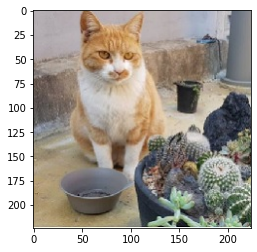

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = readb64(encoded_string)
img = img/255.
plt.imshow(img)
plt.show()

In [0]:
# 코드 5-28 InceptionResNetV2 모델 불러오기 및 예측

import numpy as np
from io import BytesIO
import base64
import cv2

from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions
from keras.layers import Input
from keras.models import Model
from keras.preprocessing import image

inception = InceptionResNetV2(weights='imagenet', input_tensor=Input(shape=(224, 224, 3)))
model = Model(inputs=inception.input, outputs=inception.get_layer('predictions').output)

img = readb64(encoded_string)
img = img/255.

pred = model.predict( np.array([img,]))

result = decode_predictions(pred)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[('n02108422', 'bull_mastiff', 0.99999726), ('n02110958', 'pug', 2.146308e-06), ('n02111129', 'Leonberg', 2.9905448e-07), ('n02109525', 'Saint_Bernard', 6.9079526e-08), ('n02109047', 'Great_Dane', 5.784231e-08)]


## 5.4.3 Flask를 이용한 딥러닝 마이크로 서비스 개발

In [0]:
# 코드 5-29 서버단의 Flask 코드

import numpy as np
from io import BytesIO
import base64
import ujson
import cv2

from flask import Flask, request, jsonify
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input
from flask_cors import CORS

app = Flask(__name__)

CORS(app)

inception = InceptionResNetV2(weights='imagenet', input_tensor=Input(shape=(224, 224, 3)))
model = Model(inputs=inception.input, outputs=inception.get_layer('predictions').output)
model._make_predict_function() 

def readb64(encoded_data):
  nparr = np.fromstring(base64.b64decode(encoded_data), np.uint8)
  img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
  img = img[:,:,::-1]
  return img

@app.route('/predict/', methods=['POST'])
def image_classifier():
  
  img = readb64(request.form['encoded_string'])
  img = img/255.

  pred = model.predict( np.array([img,]))
  
  result = decode_predictions(pred)[0]
  result_dict = {'result' : str(result)}

  response = ujson.dumps(result_dict)
  
  return jsonify(response)

In [0]:
# 코드 5-30 Flask 실행 배시 명령어

!flask run --host=0.0.0.0

In [0]:
# 코드 5-31 이미지를 읽어와 Flask에 예측 요청하기

import requests, base64
import ujson

with open("cat.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

data_dict = {"encoded_string": encoded_string}
    
r = requests.post('http://localhost:5000/predict', data=data_dict)
result = ujson.loads(r.text)
print(result)

{"result": "[('n02123159', 'tiger_cat', 0.8271612), ('n02124075', 'Egyptian_cat', 0.10363766), ('n02123045', 'tabby', 0.0681974), ('n04589890', 'window_screen', 0.00014175242), ('n04209239', 'shower_curtain', 0.00011354922)]"}
